In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/Shareddrives/is/733_data mining/hw3/faithful.csv')

print(df.head())


   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


In [3]:
#check for null values

print(df.isnull().sum())


eruptions    0
waiting      0
dtype: int64


In [4]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


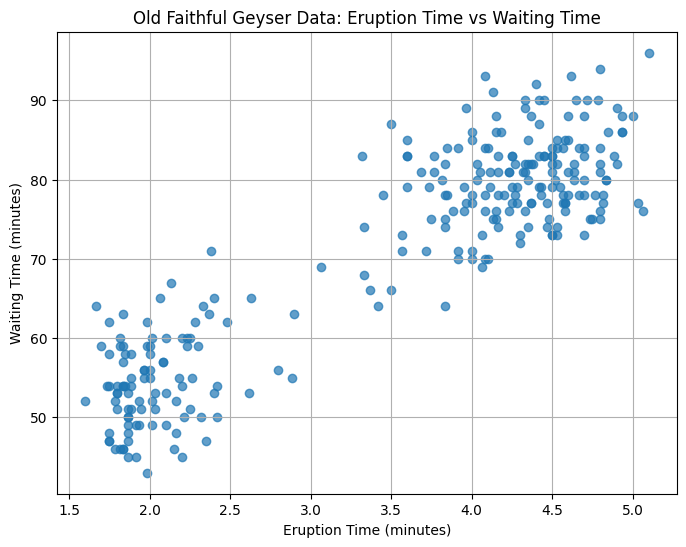

In [7]:
# Scatter plot: eruption time vs waiting time
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7)
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('Old Faithful Geyser Data: Eruption Time vs Waiting Time')
plt.grid(True)
plt.show()

In [8]:
# problem 2
#Q1
#(a)	Your source code for the k-means algorithm. You need to implement the algorithm from scratch.
import numpy as np
import matplotlib.pyplot as plt

# Get the features: eruption time and waiting time
X = df[['eruptions', 'waiting']].values

# Set number of clusters
k = 2

# Function to initialize random centroids
def initialize_centroids(X, k):
    np.random.seed(42)  # for reproducibility
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Function to compute distance
def compute_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

# K-Means algorithm
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    objective_function = []

    for it in range(max_iters):
        # Assign clusters
        clusters = []
        for x in X:
            distances = compute_distance(x.reshape(1, -1), centroids)
            cluster = np.argmin(distances)
            clusters.append(cluster)

        clusters = np.array(clusters)

        # Compute new centroids
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

        # Calculate the objective function (sum of squared distances)
        obj = 0
        for i in range(k):
            obj += np.sum((X[clusters == i] - centroids[i]) ** 2)
        objective_function.append(obj)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters, objective_function

# Run k-means
centroids, clusters, objective_function = k_means(X, k)

# Final cluster assignments
print("Centroids:\n", centroids)


Centroids:
 [[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


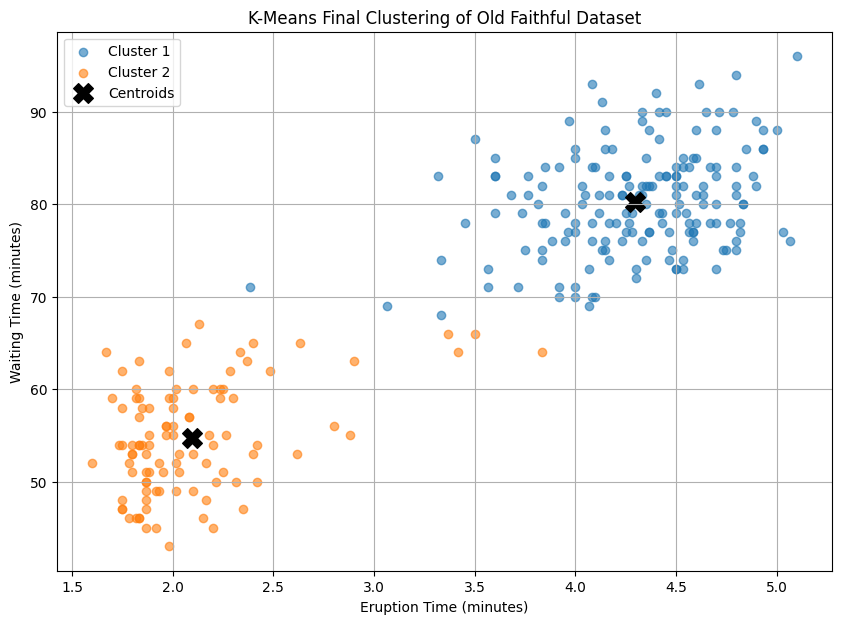

In [9]:
# (b)	A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points)
X = df[['eruptions', 'waiting']].values

# Assume you already have 'centroids' and 'clusters' from your k-means function

# Plotting
plt.figure(figsize=(10, 7))

# Plot each cluster with different color
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i in range(len(np.unique(clusters))):
    plt.scatter(
        X[clusters == i, 0],
        X[clusters == i, 1],
        label=f'Cluster {i+1}',
        alpha=0.6
    )

# Plot cluster centers
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='black',
    marker='X',
    s=200,
    label='Centroids'
)

# Labels and title
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('K-Means Final Clustering of Old Faithful Dataset')
plt.legend()
plt.grid(True)
plt.show()

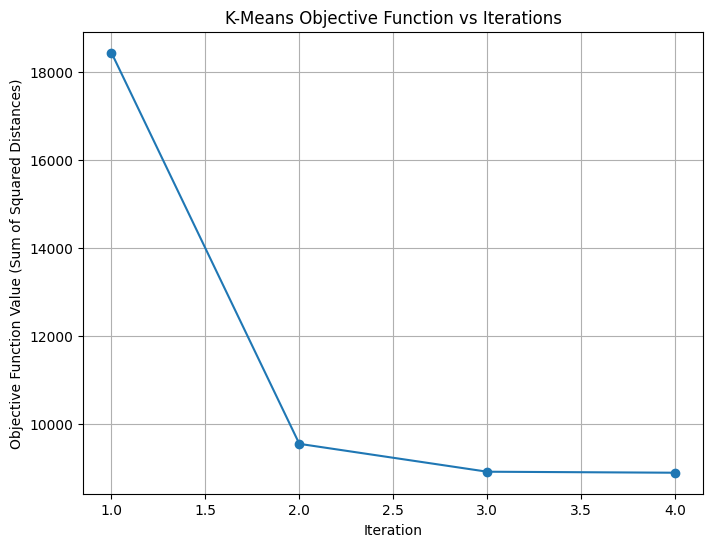

In [10]:
#c A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is

plt.figure(figsize=(8,6))
plt.plot(range(1, len(objective_function)+1), objective_function, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Sum of Squared Distances)')
plt.title('K-Means Objective Function vs Iterations')
plt.grid(True)
plt.show()
